# Project 4: Machine Learning Models for the Titanic
### Montgomery College, DATA201 Fall 2019  [Lucy Murray](lmurra38@montgomerycollege.edu)

This project is an extention of my third project. It utilizes the same dataset that comes from Kaggle's "Titanic: Machine Learning from Disaster" competition. It contains three datasets relating to the infamous Titanic shipwreck on April 15th, 1912. Unfortunately, 1502 out of 2224 passengers and crew onboard died in this tragedy. The goal of Kaggle's competition is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The dataset compiled by Kaggle provides information on the survivalship of Titanic passengers, summarized according to economic status, sex, age and survival. I will create a decision tree model and then test its accuracy. This project follows code and concepts contained in ["Decision Tree Classification in Python" by Avinash Navlani
](https://www.datacamp.com/community/tutorials/decision-tree-classification-python), ["Predicting the Survival of Titanic Passengers" by Niklas Donges
](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8), [this Kaggle notebook using the Titantic data](https://www.kaggle.com/lisastuart/titanic-python-decision-trees), as well as [this one](https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset).

Classification is a two-step process, learning step and prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data. Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem.

I am in interested in answering the following question:

4. Use scikit-learn DecisionTree  Classification or Regression to train, test and predict a categorical or quantitative target variable respectively. Use appropriate metric and interpret the meaning of the score.

5. In the case of classification, predict the classes of the test data. Predict the class probability of the test data

6. Plot the tree with tree.plot_tree after the training

7. Interpret the result of the algorithm

8. Submit a link to the GitHub URL and Present in the class

### Importing the Data

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from subprocess import check_output
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

### Getting the Data

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

### Data Dictionary

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition</th>
      <th>Key</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>survival</td>
      <td>Survival</td>
      <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
      <td>pclass</td>
      <td>Ticket class</td>
      <td>1 = 1st, 2 = 2nd, 3 = 3rd</td> 
    </tr>
    <tr>
      <td>sex</td>
      <td>Sex</td>
      <td></td> 
    </tr>
    <tr>
      <td>Age</td>
      <td>Age in years</td>
      <td></td> 
    </tr>
    <tr>
      <td>sibsp</td>
      <td># of siblings / spouses aboard the Titanic</td>
      <td></td> 
    </tr>
    <tr>
      <td>parch</td>
      <td># of parents / children aboard the Titanic</td>
      <td></td> 
    </tr>
    <tr>
      <td>ticket</td>
      <td>Ticket number</td>
      <td></td> 
    </tr>
    <tr>
      <td>fare</td>
      <td>Passenger fare</td>
      <td></td> 
    </tr>
    <tr>
      <td>cabin</td>
      <td>Cabin number</td>
      <td></td> 
    </tr>
    <tr>
      <td>embarked</td>
      <td>Port of Embarkation</td>
      <td>C = Cherbourg, Q = Queenstown, S = Southampton</td> 
    </tr>
    
    
  </tbody>
</table>

### Looking at the test-set

In [3]:
# Looking at the test data set
test_df.info()
test_df.describe()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Looking at the training-set:

In [4]:
# Observing the general structure of the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training-set has 891 examples, 11 features, and the target variable is whether or not the passenger survived.

In [5]:
# Listing a summarization of the features
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the table of, I learned that 38 percent out of the training-set survived the titanic, the age range is from 0.4 to 80, and that age has missing features with only 714 values.

In [6]:
# Observing the head of the dataframe 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The head of the data shows that several features need to be converted into numeric ones and that some features are missing values. Furthermore, some features have widely different ranges that will need to be converted into roughly the same scale.

### Dropping PassengerID

In [7]:
train_df = train_df.drop(['PassengerId'], axis=1)

# Preparing and Wrangling with Pandas and Numpy

I decided to prepare and wrangle my data with the pandas and numpy packages. First, I checked missing values and found that the Cabin, Age, and Embarked features have missing values. Because the Cabin feature had 77.1% missing, I decided to remove it entirely. I generated random numbers based on the mean of the Age value to make up for the 19.9% mising values. And finally, for Embarked I decided to fill the missing 2 values with the most common one.

### Overview of Missing Values

In [8]:
# Checking the missing values
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


**Cabin:** Since 77% of the cabin feature is missing, it may be easiest to drop it from the dataset.

In [9]:
# Dropping the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

**Age:** I decided to create an array with random numbers based on the mean age value in regards to the standard deviation and is_null from both the train and test datasets to fill in the missing values for age.

In [10]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
# Confirm there are now no missing values
train_df["Age"].isnull().sum()

0

**Embarked:** Since Embarked only has 2 missing values, I decided to fill these with the most common value of S.

In [11]:
# Checking the most common value
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [12]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

# Exploratory Data Analysis

I am now going the Matplotlib and Seaborn packages to visualize the data. I want to look at the features I am interested in, and create observations to determine how to best conduct the Decision Tree Classification.

### Converting Features

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 66.2+ KB


**Fare:** I converted Fare from float to int64.

In [14]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

**Sex:** I converted Sex to be numeric with male = 0 and female = 1.

In [15]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

**Ticket:** I decided to drop this feature from the dataset.

In [16]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

**Embarked:** I converted Embarked to be numeric with S = 0, C = 1, and Q = 2.

In [17]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**Name:** I converted Name to be numeric with Null = 0, Mr = 1, Miss = 2, Mrs = 3, Master = 4, and Rare = 5.

In [18]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [19]:
# Glancing at the converted features again
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null int64
Title       891 non-null int64
dtypes: int32(2), int64(7)
memory usage: 55.8 KB


In [20]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7,0,1
1,1,1,1,38,1,0,71,1,3
2,1,3,1,26,0,0,7,0,2
3,1,1,1,35,1,0,53,0,3
4,0,3,0,35,0,0,8,0,1


# Creating Categories

**Age:** After converting the ‘age’ feature from a float to integer, I will create ae new ‘AgeGroup” variable, by categorizing every age into a group.

In [21]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [22]:
# let's see how it's distributed
train_df['Age'].value_counts()

4    170
6    155
3    146
5    144
2    115
1     93
0     68
Name: Age, dtype: int64

**Fare:** For the 'Fare' feature, I need to first convert it into an integer. I will also fill in al NA values with 0. Then I will create a category that is cut such that there is an even distribution of values in each category. I can utilize the sklearn "qcut()" function to see how to best form these categories.

In [23]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [24]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [25]:
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

# Building New Features

### Age times Class

In [26]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

### Siblings Feature

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that shows if someone is not alone.

In [27]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()


1    537
0    354
Name: not_alone, dtype: int64

### Fares Per Person

In [28]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [29]:
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Class,relatives,not_alone,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,6,1,0,0
1,1,1,1,5,1,0,3,1,3,5,1,0,1
2,1,3,1,3,0,0,0,0,2,9,0,1,0
3,1,1,1,5,1,0,3,0,3,5,1,0,1
4,0,3,0,5,0,0,1,0,1,15,0,1,1
5,0,3,0,5,0,0,1,2,1,15,0,1,1
6,0,1,0,6,0,0,3,0,1,6,0,1,3
7,0,3,0,0,3,1,2,0,4,0,4,0,0
8,1,3,1,3,0,2,1,0,3,9,2,0,0
9,1,2,1,1,1,0,2,1,3,2,1,0,1


# Visualizing the Processed Features

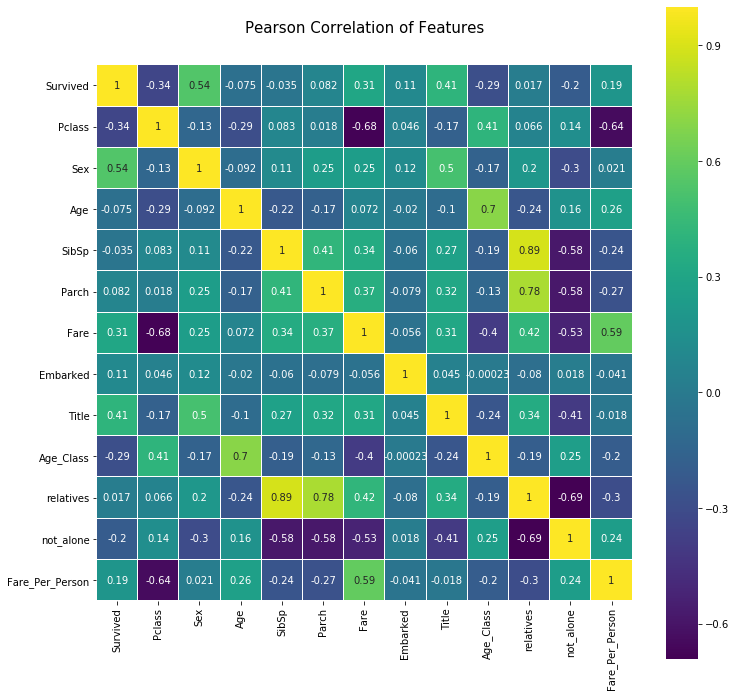

In [30]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

This heatmap provides a general predictive value of each feature. In this case, Sex and Title show the highest correlations (in absolute terms) with the class (Survived): 0.54 and 0.41 respectively.

# Cross Validation

Cross Validation is a model validation technique that splits the training dataset in a given number of "folds". Each split uses different data for training and testing purposes, allowing the model to be trained and tested with different data each time. This allows the algorithm to be trained and tested with all available data across all folds, avoiding any splitting bias and giving a good idea of the generalisation of the chosen model. The main downside is that Cross Validation requires the model to be trained for each fold, so the computational cost can be very high for complex models or huge datasets.

# Building Machine Learning Models

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

### Contain features in X and target variable in Y

In [31]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [32]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Class,relatives,not_alone,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,6,1,0,0
1,1,1,1,5,1,0,3,1,3,5,1,0,1
2,1,3,1,3,0,0,0,0,2,9,0,1,0
3,1,1,1,5,1,0,3,0,3,5,1,0,1
4,0,3,0,5,0,0,1,0,1,15,0,1,1
5,0,3,0,5,0,0,1,2,1,15,0,1,1
6,0,1,0,6,0,0,3,0,1,6,0,1,3
7,0,3,0,0,3,1,2,0,4,0,4,0,0
8,1,3,1,3,0,2,1,0,3,9,2,0,0
9,1,2,1,1,1,0,2,1,3,2,1,0,1


### Logistic Regression

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Decision Tree

In [34]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

### K Nearest Neightbor

In [35]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### Random Forest

In [36]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Comparing Models

In [37]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest'],
    'Score': [acc_log, acc_decision_tree, acc_knn, acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
91.25,Random Forest
86.64,KNN
83.73,Decision Tree
82.04,Logistic Regression


# Feature Importance from the Random Forest

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.
To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [38]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.219
Sex,0.183
Age_Class,0.105
Pclass,0.092
Age,0.083
Fare,0.081
relatives,0.061
Embarked,0.056
Fare_Per_Person,0.043


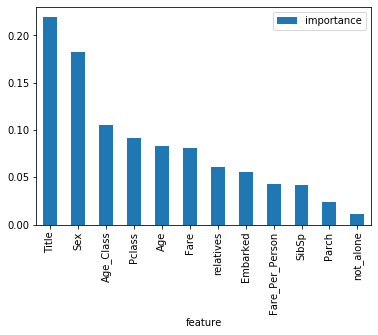

In [39]:
importances.plot.bar()

Conclusion:
not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But I think it’s just fine to remove only Alone and Parch.

In [40]:
train_df = train_df.drop("not_alone", axis=1)
test_df = test_df.drop("not_alone", axis=1)

train_df = train_df.drop("Parch", axis=1)

In [41]:
# Training random forest again:    
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

91.25 %


The results are the same!

# Visualizing the Decision Tree

In [42]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test_df))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train_df):
        f_train = train_df.loc[train_fold] # Extract train data with cv indices
        f_valid = train_df.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.782285
         2          0.799189
         3          0.826030
         4          0.829401
         5          0.805943
         6          0.802484
         7          0.799189
         8          0.795818
         9          0.811486
        10          0.804782
        11          0.808165
        12          0.799176


The best max_depth parameter seems therefore to be 4 (82.9% average accuracy across the 10 folds), and feeding the model with more data results in worst results probably due to over-fitting. We'll therefore use 4 as the max_depth parameter for our final model.

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


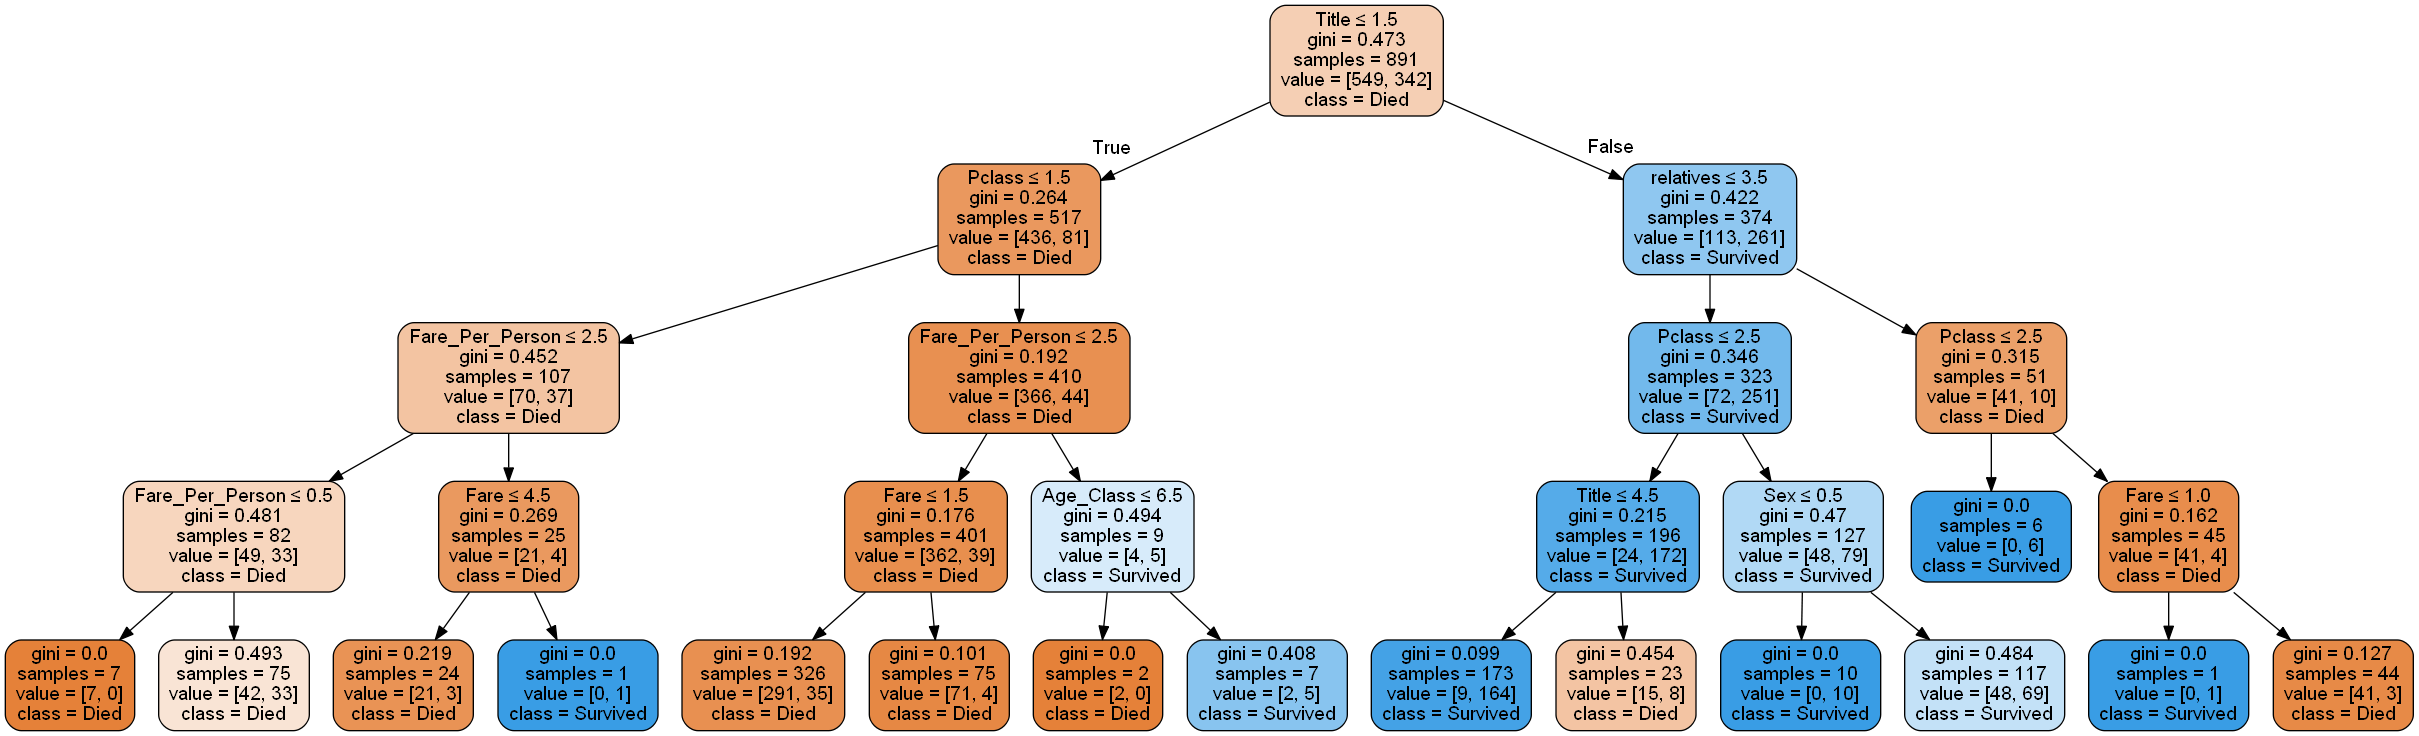

In [43]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns,
                max_depth = 4,
                class_names = ['Died', 'Survived'],
                impurity = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**How to read the decision tree:**
* First line of each node (except those of the final row) shows the splitting condition in the form "feature <= value".
* The next line is the Gini Impurity node. It measures the disorder of a set of elements. It is calculated as the probability of mislabelling an element assuming that the element is randomly labelled according the the distribution of all the classes in the set.
* "samples" - number of observations contained in the node.
* "value" - class distribution of the samples ([count non_survived, count survived]).
* "class" - predominant class of each node, and this is how our model will classify an observation.
* The colour also represents the class, the opacity increasing with the actual distribution of samples.

**Our model can therefore be summarised with 4 simple rules:**

If our observation includes de "Mr" Title (Mr = 1):
* then we classify it as not survived (all the branches in the left side of the tree lead to an orange node).

If it doesn't include "Mr" Title:
* relatives is 3 or less, then we classify it as survived.
* relatives is more than 3 and Pclass is 2 or less, then we classify it as survived.
* relatives is more than 3 and Pclass is more than 2, then we classify it died.

**Final conclusions:**
* Misters" seem to have honoured their title and sacrificed themselves in favour of women and men with more exotic titles like "Master" or "Dr".
* Smaller families had better chances to survive, maybe because bigger families tried to stick together or look for missing members and therefore didn't had places left in the lifeboats.
* 3rd class passengers had also less chances to survive so probably passengers belonging to upper social social classes were privileged, or simply 3rd class cabins may have been further away of the lifeboats.